# Monads for normal people!

Dustin Getz
@dustingetz


# intended audience

* coders

* who are comfortable with lambdas

* who learn by example

# goals

* how monads work?
* how do monads help?
* are monads useful IRL?
* especially in enterprise?
* where do they fall short and what's next?

# large codebases are complex

* Spring, EJB, AspectJ, DI, AOP
* Common goal: make code look like business logic
* (to varying degrees of success)

# Aspect Oriented Programming

*From Wikipedia...*

# Lots of code to follow

* Pay attention to how functions compose

# a bank API

In [2]:
from collections import namedtuple

Person = namedtuple('Person', 'name')
Account = namedtuple('Account', 'id')
Balance = namedtuple('Balance', ['cash', 'ccy'])

alice = Person('Alice')
bob = Person('Bob')


def get_account(person):
    if person.name == 'Alice': return Account(1)
    elif person.name == 'Bob': return Account(2)
    else: return None

def get_balance(account):
    if account.id == 1: return Balance(1000000, 'usd')
    elif account.id == 2: return Balance(75000, 'usd')
    else: return None

def get_qualified_amount(balance):
    if balance.cash > 200000: return balance.cash
    else: return None


# what we want to write

In [13]:
def get_loan(name):
    account = get_account(name)
    balance = get_balance(account)
    loan = get_qualified_amount(balance)
    return loan

# boss would write this code

```python
# POSIX

alice | get_account | get_balance | get_qualified_amount
```

In [4]:
# Functions

get_qualified_amount( get_balance( get_account( alice ) ) )

1000000

```python
# Object-Oriented

alice.get_account().get_balance().get_qualified_amount()
```

# I love `AttributeErrors` !

In [5]:
# get_account(None)

# what the production code looks like :-(

In [6]:
def get_loan(name):
    account = get_balance(name)
    if not account:
        return None

    balance = get_balance(account)
    if not balance:
        return None

    loan = get_qualified_amount(balance)
    return loan

# factor! abstract! happy!

In [7]:
def bind(v, f):
    if v:            # v == alice
        return f(v)  # get_account(alice)
    else:
        return None


In [8]:
alice = Person('Alice')
bind(alice, get_account)

Account(id=1)

In [9]:
def bind(v, f):
    if v:
        return f(v)
    else:            # v == None
        return None  # don't call f


In [12]:
alice = Person(None)
print(bind(None, get_account))

None


# the code we really want to write

In [19]:
def bind(v, f): return f(v) if v else None

def get_loan(name):
    account = bind(name, get_account)
    balance = bind(account, get_balance)
    loan = bind(balance, get_qualified_amount)
    return loan

In [20]:
alice = Person('Alice')

get_loan(alice)

1000000

In [21]:
get_loan(None)

# or more succinctly

In [22]:
def bind(v, f): return f(v) if v else None

def m_pipe(val, fns):
    m_val = val
    for f in fns:
        m_val = bind(m_val, f)
    return m_val

fns = [get_account, get_balance, get_qualified_amount]

m_pipe(alice, fns)

1000000

In [23]:
dustin = Person('Dustin')

m_pipe(dustin, fns)

# big picture goal

* make the code look like the business logic

* *"good closure programmers write a language to write their programs in"* -- DSL

* build a language to build your business logic

* add features without changing your business logic

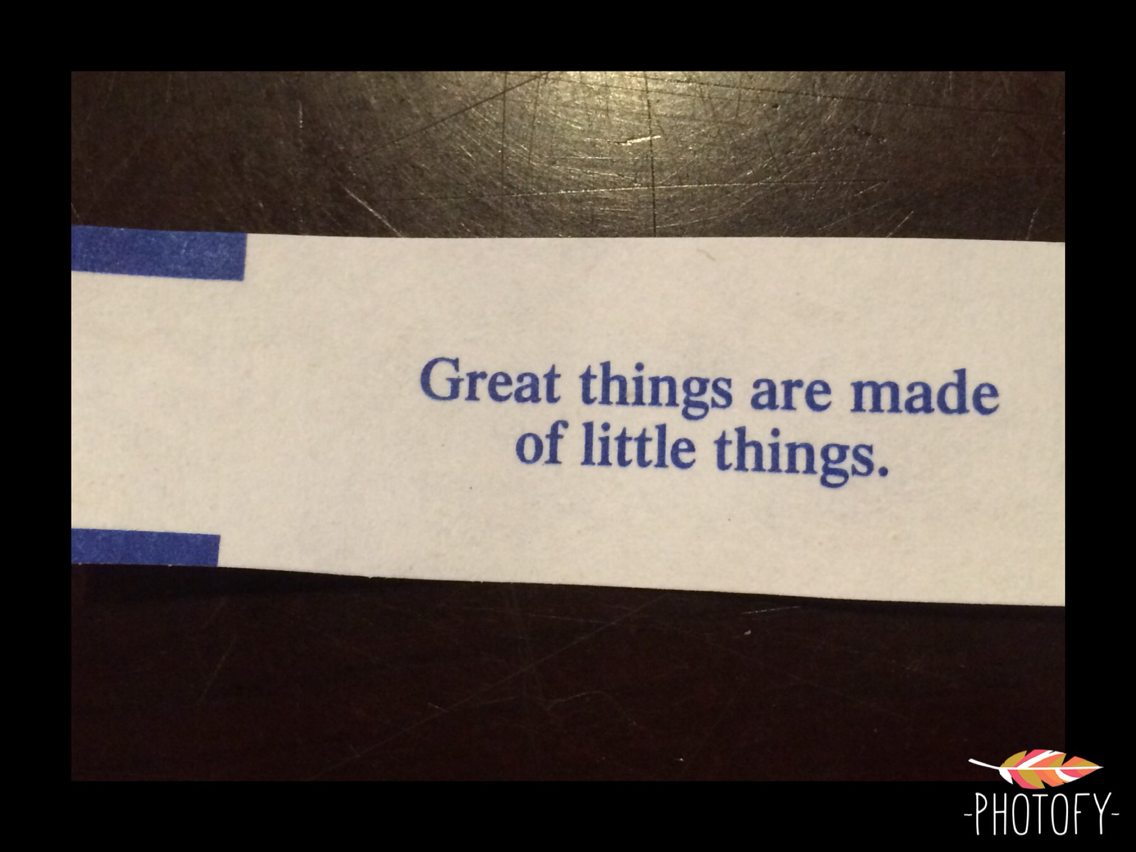

# add a feature to our API

In [28]:
from collections import namedtuple

Person = namedtuple('Person', 'name')

AccountWithError = namedtuple('AccountWithError', ['id', 'error'])
BalanceWithError = namedtuple('BalanceWithError', ['cash', 'ccy', 'error'])

QualifiedAmountWithError = namedtuple('QualifiedAmountWithError', ['cash', 'ccy', 'error'])

alice = Person('Alice')
bob = Person('Bob')


def get_account(person):
    if person.name == 'Alice': return AccountWithError(1, None)
    elif person.name == 'Bob': return AccountWithError(2, None)
    else: return AccountWithError(None, "No account for {}".format(person.name))

def get_balance(account):
    if account.id == 1: return BalanceWithError(1000000, 'usd', None)
    elif account.id == 2: return BalanceWithError(75000, 'usd', None)
    else: return BalanceWithError(None, "No balance for account {}".format(account.id))

def get_qualified_amount(balance):
    if balance.cash > 200000: return QualifiedAmountWithError(balance.cash, balance.ccy, None)
    else: return QualifiedAmountWithError(None, None, "Insufficient funds of {}".format(balance.cash))



# what does `bind` look like now ?

In [ ]:
# Slide 20/47 